## TRABAJO FINAL METODOLOGÍA DE LA OPINIÓN PÚBLICA

### "Análisis de resultados en las elecciones generales 2023 para CABA"


#### Grupo: Matías Chiampan, Nicolas Faccini, Camila Valeff

El objetivo del siguiente trabajo consistió en examinar los resultados electorales en la instancia de elecciones generales dentro de CABA. 
Para ello se utilizó Python y diferentes librerias importadas con el fin de robustecer la capacidad de análisis, incorporando diversidad de gráficas. 

In [3]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')
Cen_viviendas = pd.read_csv('censo2010/censo/vivienda.csv')
Cen_hogares = pd.read_csv('censo2010/censo/hogar.csv')
Cen_personas = pd.read_csv('censo2010/censo/persona.csv')
Cen_dpto = pd.read_csv('censo2010/censo/dpto.csv')
Cen_frac = pd.read_csv('censo2010/censo/frac.csv')
Cen_prov = pd.read_csv('censo2010/censo/prov.csv')
Cen_radio= pd.read_csv('censo2010/censo/radio.csv')
#merge para unificar personas-hogares

merge_persona_hogar = pd.merge(Cen_personas, Cen_hogares[['HOGAR_REF_ID', 'ALGUNBI', 'VIVIENDA_REF_ID']], on='HOGAR_REF_ID', how='left')

#merge para unificar el combinado anterior con viviendas

merge_total = pd.merge(merge_persona_hogar, Cen_viviendas[['VIVIENDA_REF_ID', 'MUNI', 'LOCAL']], on='VIVIENDA_REF_ID', how='left')

#total base censo por persona, filtrado por las comunas que pertenecen a CABA.
censo_caba = merge_total[(merge_total['MUNI'] >= 20010001) & (merge_total['MUNI'] <= 20150001)]

censo_caba

#hacemos un replace para que los valores de id local coincidan con los ids de comuna en la base de elecciones (representan lo mismo)
nuevos_codigos = {2001010:1,
2002010:2,
2003010:3,
2004010:4,
2005010:5,
2006010:6,
2007010:7,
2008010:8,
2009010:9,
2010010:10,
2011010:11,
2012010:12,
2013010:13,
2014010:14,
2015010:15
}

censo_caba['LOCAL'] = censo_caba['LOCAL'].replace(nuevos_codigos)
CANT_personas_nbiP = censo_caba[censo_caba['ALGUNBI'] == 1].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_ALGUNBI')
pd.DataFrame(CANT_personas_nbiP)
CANT_personas_nbiP['P_de_poblacion_total_con_algun_NBI'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['conteo_ALGUNBI'].sum()) * 100).round(1).astype(str) + '%'
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Poblacion_de_comuna')
CANT_personas_nbiP = pd.merge(CANT_personas_nbiP, poblacion_por_comuna, on='LOCAL')
CANT_personas_nbiP['P_segun_poblacion_de_comuna'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['Poblacion_de_comuna']) * 100).round(1)
Total_NBI_caba = CANT_personas_nbiP['conteo_ALGUNBI'].sum()
pd.DataFrame(CANT_personas_nbiP)
CANT_personas_ES = censo_caba[censo_caba['P09'].isin([5,6,7,8])].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_personas_secundario')
pd.DataFrame(CANT_personas_ES)
CANT_personas_ES['Porcentaje que representa de la población total'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['conteo_personas_secundario'].sum()) * 100).round(1).astype(str) + '%'
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna')
poblacion_por_comuna_m18 = censo_caba[censo_caba['P03'] >= 18].groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna_m18')
merged_df = pd.merge(CANT_personas_ES, poblacion_por_comuna, on='LOCAL')
CANT_personas_ES = pd.merge(merged_df, poblacion_por_comuna_m18, on='LOCAL')
CANT_personas_ES['P_segun_poblacion_de_comuna'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['Población de comuna_m18']) * 100).round(1)
CANT_personas_ES.sort_values(by='P_segun_poblacion_de_comuna', ascending=False)
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
cant_votos_total_caba = df_resultados_caba['votos_cantidad'].sum()
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_caba['COMUNA'] = df_caba['COMUNA'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_resultadosCaba = df_resultados[(df_resultados['distrito_id'] == 1) & 
                                  (df_resultados['cargo_nombre'] == "PRESIDENTE Y VICE")]

df_resultadosCaba = df_resultadosCaba[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]

df_resultadosCaba.reset_index(drop=True, inplace=True)
df_resultados_agrupado = df_resultadosCaba.groupby(['seccion_id', 'agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()

df_resultados_agrupado = df_resultadosCaba.groupby(['seccion_id', 'agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()
df_resultados_agrupado

# Encontrar el índice del máximo en la columna 'votos_cantidad' dentro de cada grupo
idx_max_votos = df_resultados_agrupado.groupby('seccion_id')['votos_cantidad'].idxmax()

# Obtener el DataFrame de los ganadores
df_ganadores_seccion = df_resultados_agrupado.loc[idx_max_votos]

C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3464051080.py:9: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3464051080.py:13: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3464051080.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como númer

## Bases de datos elecciones generales 2023

Con el fin de hacer un análisis electoral, es necesario conocer a la población de la Ciudad de Buenos Aires. Para eso, usamos las bases del Censo 2010. 
Nos planteamos las siguientes preguntas que nos ayudarán a responder cómo se compone el electorado porteño:

    1. ¿Cuáles son las comunas con mayor cantidad de hogares/personas con alguna necesidad básica insatisfecha (NBI)?
    2. Según nivel educativo, ¿Cómo se distribuye el % de personas con un nivel educativo mayor a secundario completo? (cods 6,7,8 var P09 Población) ¿Y con al menos secundario completo?
    

Primero, se calculó cuantas personas tienen al menos alguna necesidad básica insatisfecha según los criterios del CENSO 2010


Para eso, creamos un mapa para visualizar cuales son las comunas que tienen mayor porcentaje de personas con al menos una necesidad básica insatisfecha en sus hogares.


C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3497068158.py:15: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')


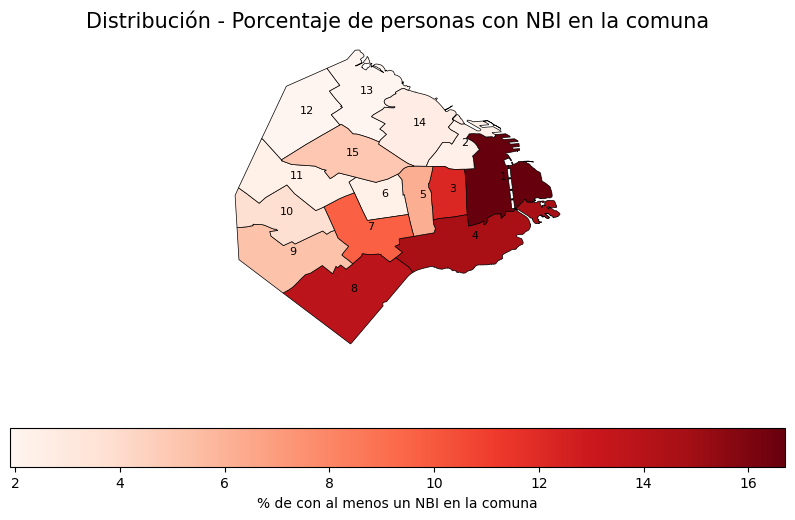

In [18]:
# Crear GeoDataFrame con los datos de de la base df_caba, donde contamos con las coordenadas de cada distrito.
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))

#forzamos que comuna sea un valor de tipo int para generar luego un join, lo mismo hicimos con la tabla que queríamos vincular "CANT personas nbiP"
gdf['COMUNA'] = gdf['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)

#Hicimos un left join entre gdf (con los datos de las comunas de caba) y "CANT personas nbiP", con los datos de necesidades básicas insatisfechas
gdf = gdf.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna P_segun_poblacion_de_comuna a valores numéricos, redondeamos los datos y los convertimos a float
gdf['P_segun_poblacion_de_comuna'] = gdf['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                'orientation': "horizontal"}, cmap='Reds', 
                   vmin=gdf['P_segun_poblacion_de_comuna'].min(), vmax=gdf['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con NBI en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

Realizamos un análisis de la población con un nivel educativo de al menos el secundario completo en 2010, por comuna. 

Luego, realizamos el mismo gráfico que aplicamos en el análisis de los casos con al menos un NBI, pero para el porcentaje de personas con el secundario o más del secundario completo


C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3271123336.py:11: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')


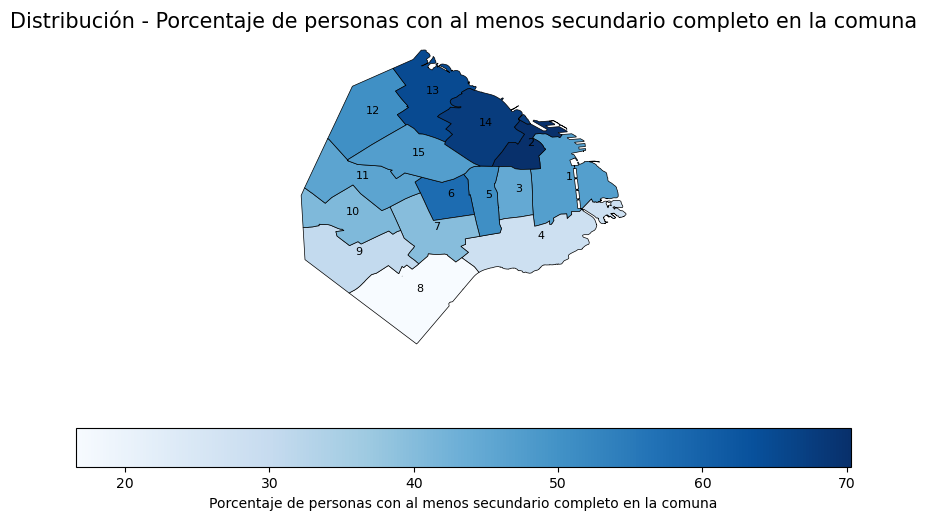

In [22]:
# Crear GeoDataFrame con geometría y datos de censo
gdf2 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf2['COMUNA'] = gdf2['COMUNA'].astype(int)
CANT_personas_ES['LOCAL'] = CANT_personas_ES['LOCAL'].astype(int)
gdf2 = gdf2.join(CANT_personas_ES.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf2['P_segun_poblacion_de_comuna'] = gdf2['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf2_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "Porcentaje de personas con al menos secundario completo en la comuna",
                                'orientation': "horizontal"}, cmap='Blues', 
                   vmin=gdf2['P_segun_poblacion_de_comuna'].min(), vmax=gdf2['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf2_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf2_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con al menos secundario completo en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

## Análisis de los resultados en CABA

Para producir un análisis de los resultaods electorales en CABA iniciamos reduciendo la base de datos inicial para que coincida con el recorte geográfico requerido. 

### Revisión de las tablas

Analizamos los valores de la base importada para comprender la distribución de los valores en ella, con el siguiente código.

Luego, implementamos el mismo análisis para el resto de las tablas sobre elecciones en 2023.

### Vinculación entre tablas - Bases elecciones


Comenzamos haciendo un merge entre dos tablas requeridas para el análisis de los resultados electorales: la primera, la base de elecciones filtrada para Ciudad de Buenos Aires (df_resultados_caba), la segunda, la base sobre los circuitos electorales y sus características en este mismo distrito (df_caba). Ambas se relacionan a partir de la columna "seccion_id" (df_resultados_caba) y la columna "comuna" (df_caba) cuyos valores son los ids asignados a las comunas de la ciudad.

Ganadores por comuna en las elecciones generales de 2023 - Por partido

### Cruces

#### Análisis de cómo se cruzan las NBI con los resultados electorales

C:\Users\BB\AppData\Local\Temp\ipykernel_8844\2702691557.py:14: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')


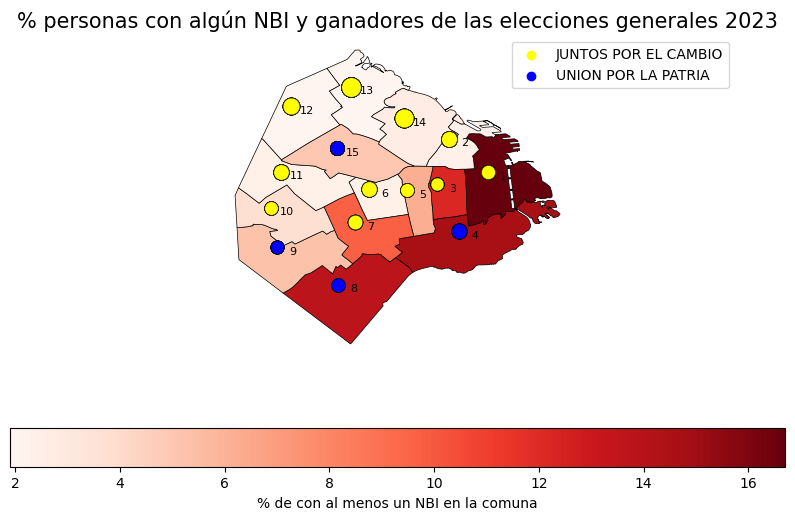

In [31]:
import seaborn as sns

# Crear GeoDataFrame con geometría y datos de censo
gdf3 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf3['COMUNA'] = gdf3['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)
gdf3 = gdf3.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')
gdf3 = gdf3.join(df_ganadores_seccion.set_index('seccion_id'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf3['P_segun_poblacion_de_comuna'] = gdf3['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf3_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                    legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                 'orientation': "horizontal"}, cmap='Reds', 
                    vmin=gdf3['P_segun_poblacion_de_comuna'].min(), vmax=gdf3['P_segun_poblacion_de_comuna'].max(),
                    edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf3_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf3_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')

# Agregar puntos para los ganadores de cada comuna
for idx, row in gdf3.iterrows():
    color = 'yellow' if row['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO' else 'blue'
    size = row['votos_cantidad'] / gdf3.groupby('agrupacion_nombre')['votos_cantidad'].transform('max').max() * 200
    centroid = gdf3_dissolved.geometry.centroid.loc[gdf3_dissolved.index == row['COMUNA']].squeeze()
    ax.scatter(centroid.x + (-0.007), centroid.y + 0.005, color=color, s=size, alpha=0.7, edgecolors='black', linewidth=0.5)
    
# Usar seaborn para mostrar leyenda
legend_labels = {'JUNTOS POR EL CAMBIO': 'yellow', 'UNION POR LA PATRIA': 'blue'}
for label, color in legend_labels.items():
    ax.scatter([], [], color=color, label=label)

# Añadir título y etiquetas
ax.set_title('% personas con algún NBI y ganadores de las elecciones generales 2023', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Ajustar posición de la leyenda
ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.show()


Para realizar una correlacion entre las variables analizadas, generamos una tabla nueva que cuenta con los datos de cantidad de votos por agrupación política, cantidad de personas con alguna NBI y cantidad de personas con estudios secundarios o superiores.

#### Correlación Agrupaciones políticas y variables sociodemográficas

In [39]:
df_resultados_caba_pivot = df_resultados_agrupado.pivot_table(index='seccion_id',columns='agrupacion_nombre',values='votos_cantidad')
df_total = df_resultados_caba_pivot.join(CANT_personas_nbiP.set_index('LOCAL')['conteo_ALGUNBI'], on='seccion_id', how='left')
df_total = df_total.join(CANT_personas_ES.set_index('LOCAL')['conteo_personas_secundario'], on='seccion_id', how='left')
df_total = df_total.reset_index()

print("Correlación Juntos por el Cambio y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='kendall'))

print("\n")
print("Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='kendall'))
print("\n")

print("Correlación La Libertad Avanza y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))

print("\n")
print("Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='kendall'))

print("Correlación Unión por la Patria y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))
print("\n")

print("\n")
print("Correlación Unión por la Patria y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='kendall'))

Correlación Juntos por el Cambio y cantidad de personas con alguna NBI


Correlación Pearson:  -0.555537111489104
Correlación spearman:  -0.7035714285714285
Correlación kendall:  -0.48571428571428577


Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  0.9268965464296802
Correlación spearman:  0.907142857142857
Correlación kendall:  0.7714285714285715


Correlación La Libertad Avanza y cantidad de personas con alguna NBI


Correlación Pearson:  0.4330818983446092
Correlación spearman:  0.3714285714285714
Correlación kendall:  0.23809523809523814


Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  -0.18221367522887047
Correlación spearman:  -0.2821428571428571
Correlación kendall:  -0.21904761904761905
Correlación Unión por la Patria y cantidad de personas con alguna NBI


Correlación Pearson:  0.4014210227457864
Correlación spearman:  0.3714285714285714
Correlaci

### Relación con la participación electoral

In [41]:
df_caba.head(4)
df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales')
df_caba2 = pd.DataFrame(df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales'))

df_resultadosCaba3 = df_resultados[(df_resultados['distrito_id'] == 1)]
df_resultadosCaba3 = df_resultadosCaba3[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]
df_resultadosCaba3.reset_index(drop=True, inplace=True)


df_resultadosCaba3.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos')
df_resultadosCaba2 =pd.DataFrame(df_resultadosCaba.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos'))
df_resultadosCaba2 = pd.merge(df_caba2.set_index('COMUNA'), df_resultadosCaba2.set_index('seccion_id'), how='left', left_index=True, right_index=True)
df_resultadosCaba2.reset_index(inplace=True)
df_resultadosCaba2['Participacion_por_comuna'] = (df_resultadosCaba2['Votos emitidos'] / df_resultadosCaba2['Votantes totales'] *100).round(1).astype('float')

participacion_total_caba = (df_resultadosCaba2['Votos emitidos'].sum() / df_resultadosCaba2['Votantes totales'].sum() *100).round(1).astype('float')
print(f'Participación total en CABA: {participacion_total_caba}')
votantes_totales_caba = df_resultadosCaba2['Votantes totales'].sum()
print(f'Cantidad de votantes en CABA: {votantes_totales_caba}')



Participación total en CABA: 76.5
Cantidad de votantes en CABA: 2497035.0


### Teniendo la participación total, ahora revisamos la participación por comuna

C:\Users\BB\AppData\Local\Temp\ipykernel_8844\3091518701.py:5: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')


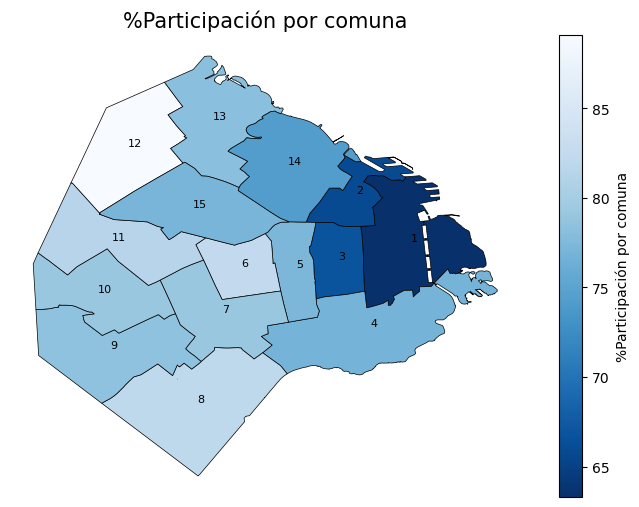

In [46]:
gdf5 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf5 = gdf5.join(df_resultadosCaba2.set_index('COMUNA'), on='COMUNA', how='left')

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf5_dissolved.plot(column='Participacion_por_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "%Participación por comuna",
                                'orientation': "vertical"}, cmap='Blues_r', 
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf5_dissolved.geometry.centroid.x, gdf5_dissolved.geometry.centroid.y, gdf5_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('%Participación por comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

#### Correlacion participación y votos


In [77]:
df_total2 = pd.merge(df_total, df_resultadosCaba2, left_on='seccion_id', right_on='COMUNA', how='left')
df_total2

,seccion_id,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA,conteo_ALGUNBI,conteo_personas_secundario,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna
0,1,3981,3230,45975,25657,38645,34311,79402,1,191557.0,121250,63.3
1,2,1912,2250,57022,17875,19225,3693,96279,2,152142.0,100235,65.9
2,3,4571,3362,39075,23562,38993,22897,68846,3,168193.0,112465,66.9
3,4,5586,4211,39963,29077,51401,32157,45852,4,174922.0,134521,76.9
4,5,4814,3675,43259,20595,42504,11079,74894,5,152252.0,117662,77.3
5,6,4208,3698,54873,20043,39230,4219,84628,6,151400.0,124701,82.4
6,7,4863,4193,48420,28137,44622,21350,68032,7,169326.0,133889,79.1
7,8,4285,3238,26068,27845,43136,25844,21764,8,133107.0,109192,82.0
8,9,4578,4047,37413,25544,39233,8504,38421,9,145237.0,114065,78.5
9,10,4719,4164,41986,23062,37457,6248,54148,10,144652.0,114417,79.1


#### Correlación partido y cantidad de votos


In [78]:
def calcular_correlaciones(df_total2, columna_votos='Votos emitidos'):
    # Filtrar solo las columnas numéricas para calcular correlaciones
    columnas = ['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']
    
    # Iterar sobre las columnas y calcular la correlación con 'cantidad de votos'
    for columna in columnas:
        correlacion = df_total2[columna].corr(df_total2[columna_votos], method='pearson')
        print(f"La correlación entre {columna} y {columna_votos} es: {correlacion.round(2)}")

calcular_correlaciones(df_total2, )


La correlación entre FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD y Votos emitidos es: 0.27
La correlación entre HACEMOS POR NUESTRO PAIS y Votos emitidos es: 0.67
La correlación entre JUNTOS POR EL CAMBIO y Votos emitidos es: 0.79
La correlación entre LA LIBERTAD AVANZA y Votos emitidos es: 0.56
La correlación entre UNION POR LA PATRIA y Votos emitidos es: 0.33


In [79]:
calcular_correlaciones(df_total2, 'Participacion_por_comuna')

La correlación entre FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD y Participacion_por_comuna es: 0.57
La correlación entre HACEMOS POR NUESTRO PAIS y Participacion_por_comuna es: 0.75
La correlación entre JUNTOS POR EL CAMBIO y Participacion_por_comuna es: 0.07
La correlación entre LA LIBERTAD AVANZA y Participacion_por_comuna es: 0.32
La correlación entre UNION POR LA PATRIA y Participacion_por_comuna es: 0.53


## Insights de los resultados

In [80]:
import scipy.stats as stats


def sample_size(population_size, confidence_level, margin_of_error):
    z = stats.norm.ppf(confidence_level + (1 - confidence_level) / 2)
    return (2 * z**2 * population_size) / (margin_of_error**2)

sample_size(2497035, 0.95, 0.05)

7673805701.065562